# Inf2-FDS Coursework 3 - Project

Nathaniel Maw - s2156578

Linus Tong - s2233306

Import Libraries


Add Imports 

In [1891]:
import os
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FormatStrFormatter
import matplotlib.patches as mpatches


Read Move Data csv

In [1892]:
data = pd.read_csv ("IMDB-Movie-Data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


Remove Description, Actors columns

In [1893]:
data = data.drop(columns=["Description","Actors"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Year                1000 non-null   int64  
 5   Runtime (Minutes)   1000 non-null   int64  
 6   Rating              1000 non-null   float64
 7   Votes               1000 non-null   int64  
 8   Revenue (Millions)  872 non-null    float64
 9   Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(3)
memory usage: 78.2+ KB


As we can see there are null values for revenue and metasocre.

Rows with NaN value needs to be removed.

In [1894]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                838 non-null    int64  
 1   Title               838 non-null    object 
 2   Genre               838 non-null    object 
 3   Director            838 non-null    object 
 4   Year                838 non-null    int64  
 5   Runtime (Minutes)   838 non-null    int64  
 6   Rating              838 non-null    float64
 7   Votes               838 non-null    int64  
 8   Revenue (Millions)  838 non-null    float64
 9   Metascore           838 non-null    float64
dtypes: float64(3), int64(4), object(3)
memory usage: 72.0+ KB


The movies with null values are removed and we can start plotting!

# 1.Year against Rating Graph
We will first plot a graph of year(X) against average rating(Y) and have a horizontal average rating of all movies

We shall start by taking the average score of each year

In [1895]:
Year_Rating = data

Year_Rating_2006 = round(Year_Rating[Year_Rating['Year'] == 2006]['Rating'].mean(), 3)
Year_Rating_2007 = round(Year_Rating[Year_Rating['Year'] == 2007]['Rating'].mean(), 3)
Year_Rating_2008 = round(Year_Rating[Year_Rating['Year'] == 2008]['Rating'].mean(), 3)
Year_Rating_2009 = round(Year_Rating[Year_Rating['Year'] == 2009]['Rating'].mean(), 3)
Year_Rating_2010 = round(Year_Rating[Year_Rating['Year'] == 2010]['Rating'].mean(), 3)
Year_Rating_2011 = round(Year_Rating[Year_Rating['Year'] == 2011]['Rating'].mean(), 3)
Year_Rating_2012 = round(Year_Rating[Year_Rating['Year'] == 2012]['Rating'].mean(), 3)
Year_Rating_2013 = round(Year_Rating[Year_Rating['Year'] == 2013]['Rating'].mean(), 3)
Year_Rating_2014 = round(Year_Rating[Year_Rating['Year'] == 2014]['Rating'].mean(), 3)
Year_Rating_2015 = round(Year_Rating[Year_Rating['Year'] == 2015]['Rating'].mean(), 3)
Year_Rating_2016 = round(Year_Rating[Year_Rating['Year'] == 2016]['Rating'].mean(), 3)

#print(Year_Rating_2008)

In [1896]:
index = py.array([2006, 2007,2008,2009,2010,2011,2012,2013,2014,2015,2016])

Year_Rating_Y = py.array([Year_Rating_2006,Year_Rating_2007,Year_Rating_2008,Year_Rating_2009,Year_Rating_2010,Year_Rating_2011,Year_Rating_2012,Year_Rating_2013,Year_Rating_2014,Year_Rating_2015,Year_Rating_2016])

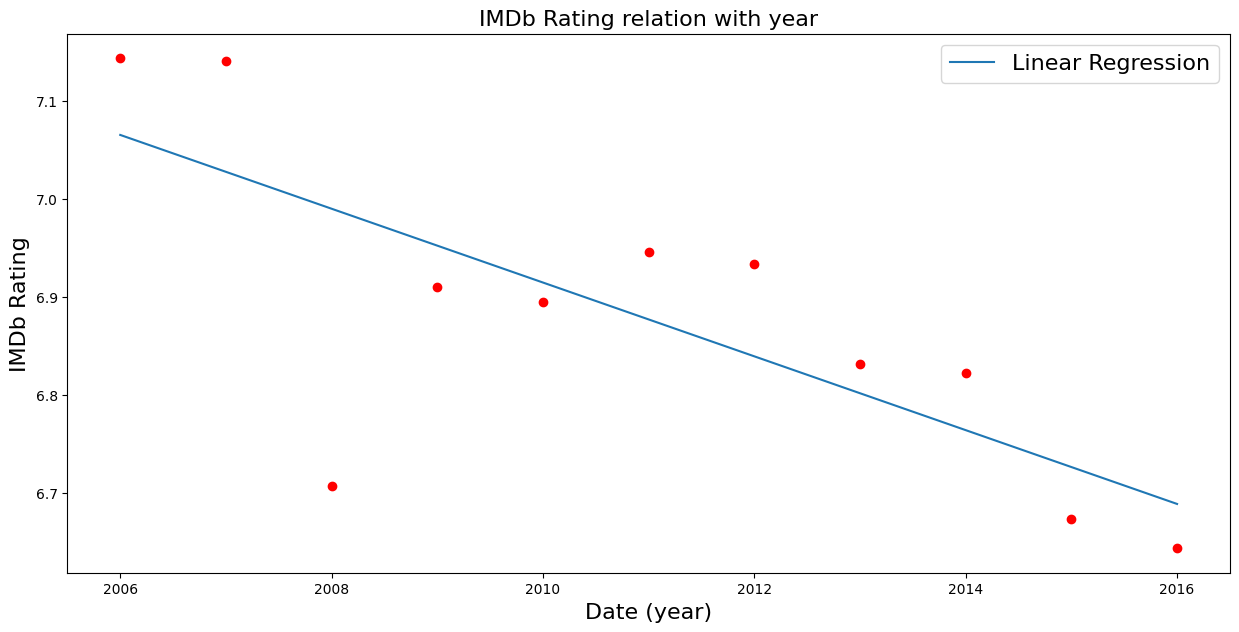

In [1897]:
fig, ax1 = plt.subplots(figsize=(15, 7))

a, b = py.polyfit(index, Year_Rating_Y, 1)

plt.xlabel('Date (year)', fontsize = 16)
plt.ylabel('IMDb Rating', fontsize = 16)

plt.plot(index, a*index+b)
plt.scatter(index, Year_Rating_Y, color='red')
plt.legend(['Linear Regression'], loc='upper right', prop={'size': 16})

plt.title('IMDb Rating relation with year', fontsize = 16)

plt.show()

# 2. Year against number of movies made

In [1898]:
Year_Number = data

Year_Number = py.flip(py.array(Year_Number['Year'].value_counts()))

print (Year_Number)

[ 41  44  45  48  57  57  62  84  93 109 198]


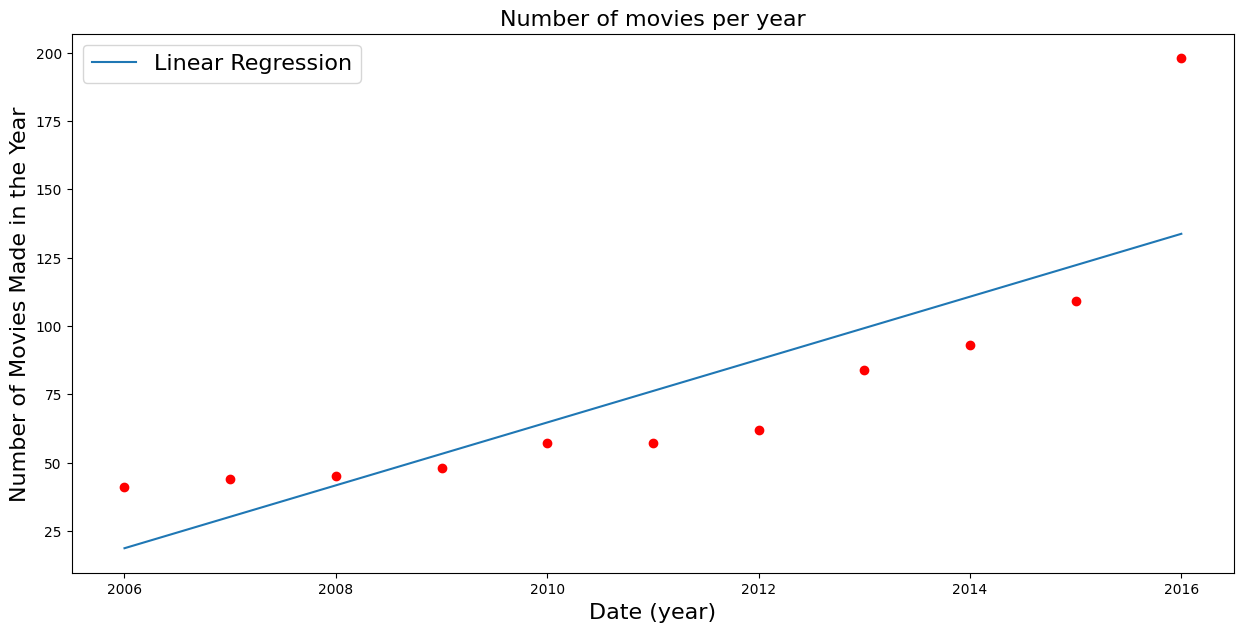

In [1899]:
fig, ax1 = plt.subplots(figsize=(15, 7))

a, b = py.polyfit(index, Year_Number, 1)

plt.xlabel('Date (year)', fontsize = 16)
plt.ylabel('Number of Movies Made in the Year', fontsize = 16)

plt.plot(index, a*index+b)
plt.scatter(index, Year_Number, color='red')
plt.legend(['Linear Regression'], loc='upper left', prop={'size': 16})

plt.title('Number of movies per year', fontsize = 16)

plt.show()

# 3. Comparing number of movies made to IMDb score**

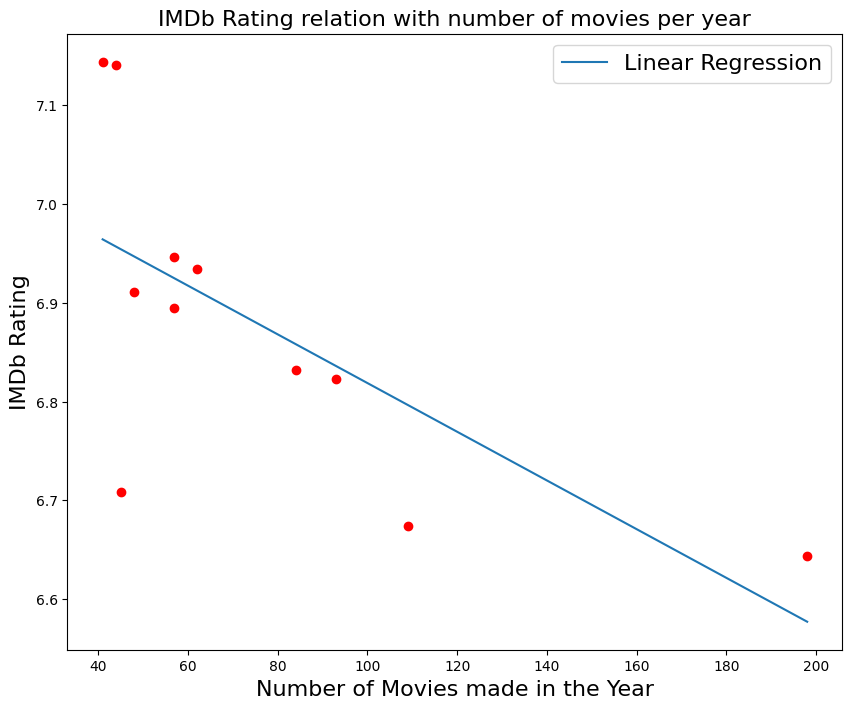

In [1900]:
fig, ax1 = plt.subplots(figsize=(10, 8))

a, b = py.polyfit(Year_Number, Year_Rating_Y, 1)


plt.xlabel('Number of Movies made in the Year', fontsize = 16)
plt.ylabel('IMDb Rating', fontsize = 16)

plt.plot(Year_Number, a*Year_Number+b)
plt.scatter(Year_Number, Year_Rating_Y, color='red')
plt.legend(['Linear Regression'], loc='upper right', prop={'size': 16})

plt.title('IMDb Rating relation with number of movies per year', fontsize = 16)

plt.show()

As shown in the graph above, we can see that the more moves made each year, the lower the average IMDb rating of that year

# 4. How directors have an effect on Success

Director data set

In [1901]:
Directors_Movies = data

Directors_Movies_Revenue = (Directors_Movies.groupby('Director' )['Revenue (Millions)'].agg(count='count', sum='sum').reset_index()) 

Directors_Movies_Rating = (Directors_Movies.groupby('Director' )['Rating'].agg(count='count', sum='sum').reset_index()) 

#Directors_Movies = Directors_Movies['Director'].value_counts().reset_index()

#Directors_Movies.columns = ['Directors', 'Number of Movies']

#Directors_Movies.drop(Directors_Movies[Directors_Movies['Number of Movies'] <= 1].index, inplace = True)
#print(Directors_Movies)

Average Revenue

In [1902]:
Directors_Movies_Revenue['Average Revenue (Millions)'] = Directors_Movies_Revenue['sum']/Directors_Movies_Revenue['count']

#print(Directors_Movies_Revenue.sort_values("Average Revenue (Millions)", ascending=False).head(10))
#print(Directors_Movies_Revenue.sort_values("Average Revenue (Millions)", ascending=False).tail(10))
#print(Directors_Movies_Revenue.sort_values("count", ascending=False).tail(10))

In [1903]:
Directors_Movies_Revenue_Head = (Directors_Movies_Revenue.sort_values("Average Revenue (Millions)").head(7))
Revenue_Head = py.array(Directors_Movies_Revenue_Head['Average Revenue (Millions)'])

Directors_Head = py.array(Directors_Movies_Revenue_Head['Director'])

Directors_Movies_Revenue_Tail = (Directors_Movies_Revenue.sort_values("Average Revenue (Millions)").tail(7))
Revenue_Tail = py.array(Directors_Movies_Revenue_Tail['Average Revenue (Millions)'])

Directors_Tail = py.array(Directors_Movies_Revenue_Tail['Director'])

Revenue = py.concatenate((Revenue_Head, Revenue_Tail), axis=None)
Directors = py.concatenate((Directors_Head, Directors_Tail), axis=None)

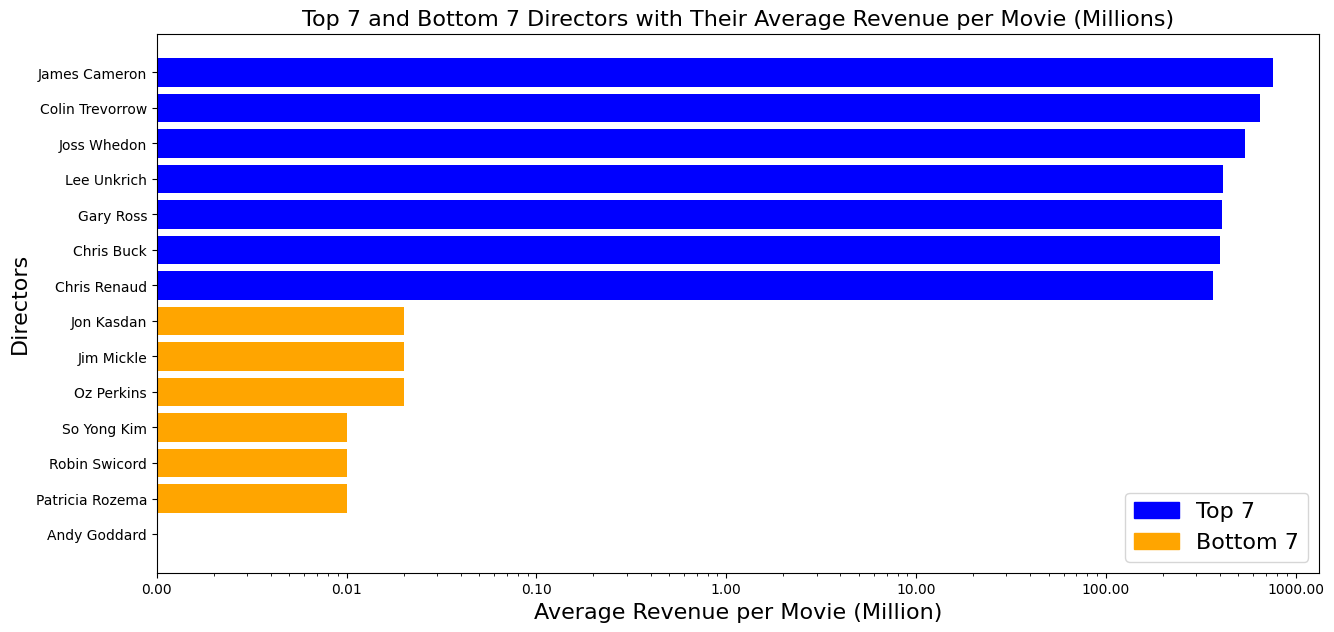

In [1904]:
fig, ax1 = plt.subplots(figsize=(15, 7))

plt.xlabel('Average Revenue per Movie (Million)', fontsize = 16)
plt.ylabel('Directors', fontsize = 16)


c = ['orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']

plt.barh(Directors, Revenue, color=c)
ax1.set_xscale('log')
ax1.set_xticks([0.001,0.01,0.1,1,10,100,1000])
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.title('Top 7 and Bottom 7 Directors with Their Average Revenue per Movie (Millions)', fontsize = 16)

Top7 = mpatches.Patch(color='blue', label='Top 7')
Bottom7 = mpatches.Patch(color='orange', label='Bottom 7')
plt.legend(handles=[Top7,Bottom7], loc='lower right', prop={'size': 16})

plt.show()

In [1905]:
Directors_Movies_Rating['Average Rating'] = Directors_Movies_Rating['sum']/Directors_Movies_Rating['count']
print (Directors_Movies_Rating.sort_values("Average Rating"))

                             Director  count   sum  Average Rating
218                   Jason Friedberg      1   1.9            1.90
216                        James Wong      1   2.7            2.70
175                      George Nolfi      1   3.9            3.90
240                       Joey Curtis      1   4.0            4.00
442                Sam Taylor-Johnson      1   4.1            4.10
..                                ...    ...   ...             ...
154  Florian Henckel von Donnersmarck      1   8.5            8.50
0                          Aamir Khan      1   8.5            8.50
318                    Makoto Shinkai      1   8.6            8.60
378                   Olivier Nakache      1   8.6            8.60
88                  Christopher Nolan      5  43.4            8.68

[524 rows x 4 columns]


In [1906]:
Directors_Movies_Rating_Head = (Directors_Movies_Rating.sort_values("Average Rating").head(7))
Rating_Head = py.array(Directors_Movies_Rating_Head['Average Rating'])

Directors_Head = py.array(Directors_Movies_Rating_Head['Director'])

Directors_Movies_Rating_Tail = (Directors_Movies_Rating.sort_values("Average Rating").tail(7))
Rating_Tail = py.array(Directors_Movies_Rating_Tail['Average Rating'])

Directors_Tail = py.array(Directors_Movies_Rating_Tail['Director'])

Rating = py.concatenate((Rating_Head, Rating_Tail), axis=None)
Directors = py.concatenate((Directors_Head, Directors_Tail), axis=None)

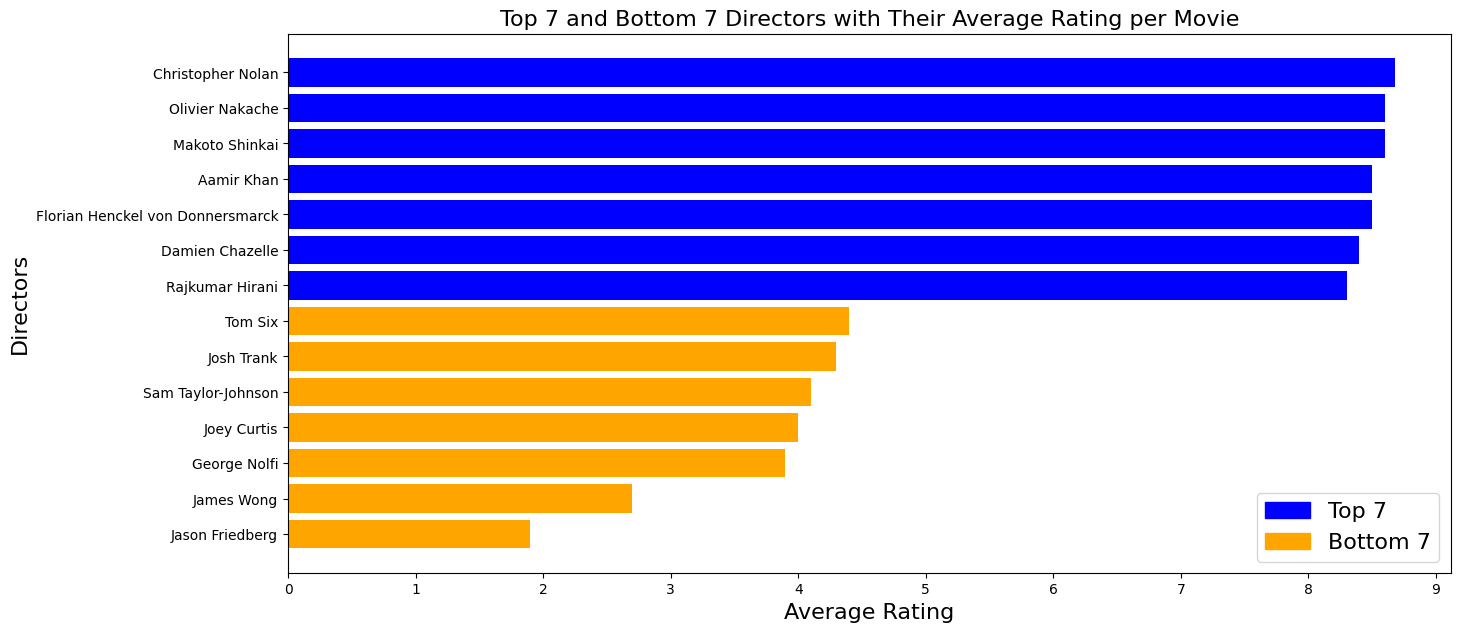

In [1907]:
fig, ax1 = plt.subplots(figsize=(15, 7))

plt.xlabel('Average Rating', fontsize = 16)
plt.ylabel('Directors', fontsize = 16)

c = ['orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']

plt.barh(Directors, Rating, color=c)
ax1.set_xticks([0,1,2,3,4,5,6,7,8,9])

plt.title('Top 7 and Bottom 7 Directors with Their Average Rating per Movie', fontsize = 16)

Top7 = mpatches.Patch(color='blue', label='Top 7')
Bottom7 = mpatches.Patch(color='orange', label='Bottom 7')
plt.legend(handles=[Top7,Bottom7], loc='lower right', prop={'size': 16})

plt.show()

# 5. Relation between rank and votes

Calculation:

In [1908]:
rank_data = data[["Rank","Votes"]]
print (rank_data)

     Rank   Votes
0       1  757074
1       2  485820
2       3  157606
3       4   60545
4       5  393727
..    ...     ...
993   994  140900
994   995  164088
996   997   73152
997   998   70699
999  1000   12435

[838 rows x 2 columns]


Graph:

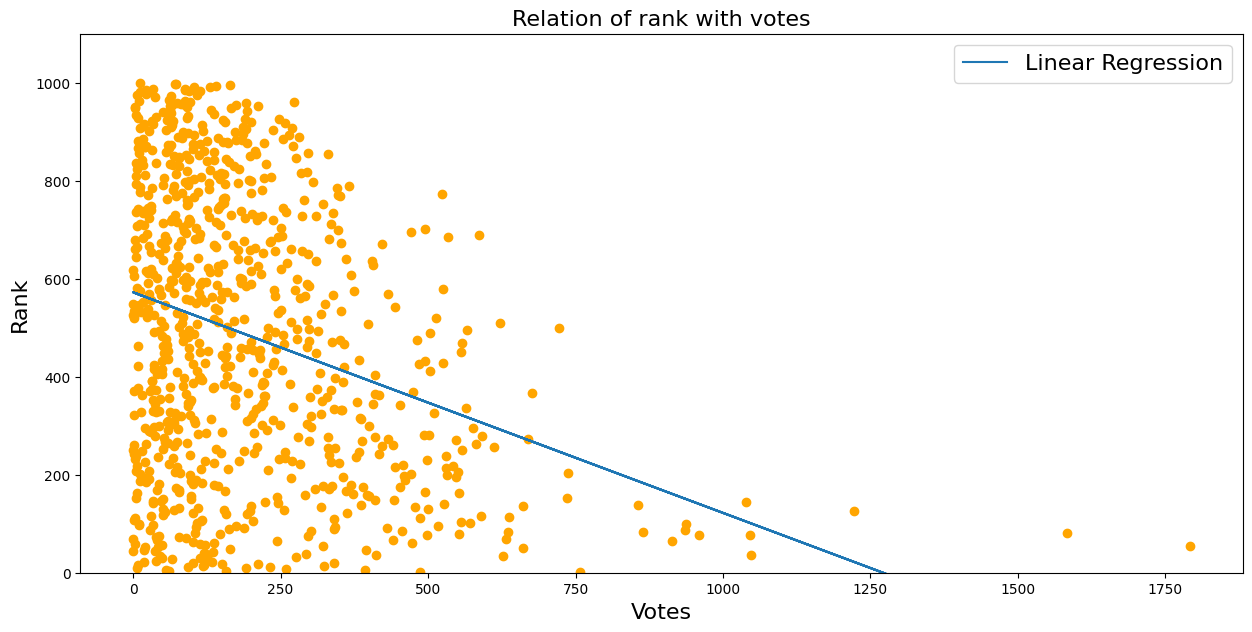

In [1909]:
fig, ax1 = plt.subplots(figsize=(15, 7))

a, b = py.polyfit(rank_data["Votes"]/1000, rank_data["Rank"], 1)

plt.xlabel('Votes', fontsize = 16)
plt.ylabel('Rank', fontsize = 16)

plt.plot(rank_data["Votes"]/1000, a*rank_data["Votes"]/1000+b)
plt.scatter(rank_data["Votes"]/1000, rank_data["Rank"], color='Orange')
plt.legend(['Linear Regression'], loc='upper right', prop={'size': 16})

plt.title('Relation of rank with votes', fontsize = 16)
ax1.set_ylim(0,1100)

plt.show()